# EDA of NOAA Lightning Strikes 2018 Database

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [14]:
# Read in the 2018 lightning strike dataset.
df= pd.read_csv('eda_using_basic_data_functions_in_python_dataset1.csv')

In [15]:
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [16]:
df.shape

(3401012, 3)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [18]:
# changing date format from a string to datetime format
df['date']= pd.to_datetime(df['date'])

In [19]:
df.groupby(['date']).sum().sort_values('number_of_strikes',ascending=False).head(10)

,number_of_strikes
date,
2018-08-29,1070457
2018-08-17,969774
2018-08-28,917199
2018-08-27,824589
2018-08-30,802170
2018-08-19,786225
2018-08-18,741180
2018-08-16,734475
2018-08-31,723624


In [21]:
# Creating a month column
df['month']=df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


In [22]:
#Calculating most number of strikes by each month

df.groupby(['month']).sum().sort_values('number_of_strikes',ascending=False).head(12)

,number_of_strikes
month,
8,15525255
7,8320400
6,6445083
5,4166726
9,3018336
2,2071315
4,1524339
10,1093962
1,860045


### Convert the Month Number to Text

In [26]:
df['month_txt']= df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


### Creating new dataframe for cleaned column

In [28]:
df_by_month= df.groupby(['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()

In [29]:
df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


### Creating Bar Chart for Above Data

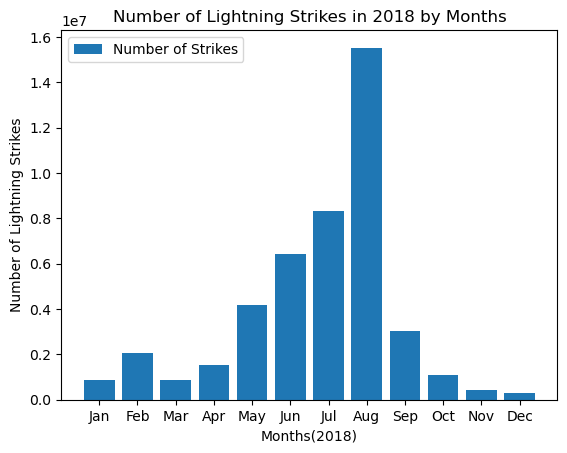

In [34]:
plt.bar(x= df_by_month['month_txt'], 
        height = df_by_month['number_of_strikes'], label= 'Number of Strikes')
plt.xlabel("Months(2018)")
plt.ylabel('Number of Lightning Strikes')
plt.title('Number of Lightning Strikes in 2018 by Months')
plt.legend()
plt.show()
